In [18]:
import os
import librosa, librosa.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from adaptive_spectrogram import AdaptiveSpectrogram
import logging
import warnings

In [19]:
logger = logging.getLogger()
logging.basicConfig(
    format="%(asctime)s %(message)s",
)
logger.setLevel(logging.INFO)
warnings.filterwarnings("ignore")

### Load the mixture signal

In [20]:
dir_parent = "example_signals"
filename_mixture_signal = "mixture_signal.wav"
mixture_signal, sr = librosa.load(os.path.join(dir_parent, filename_mixture_signal))

### Visualize the usual spectrogram constructed using window sizes of 2048 and 4096
#### Notice how when the window size is 2048, the harmonics appear much thicker, but the drum onsets appear clearly. We have a good temporal resolution but a poor frequency resolution
#### With a window size of 4096, the harmonics appear much clearly, but the drum onsets appear smeared in time

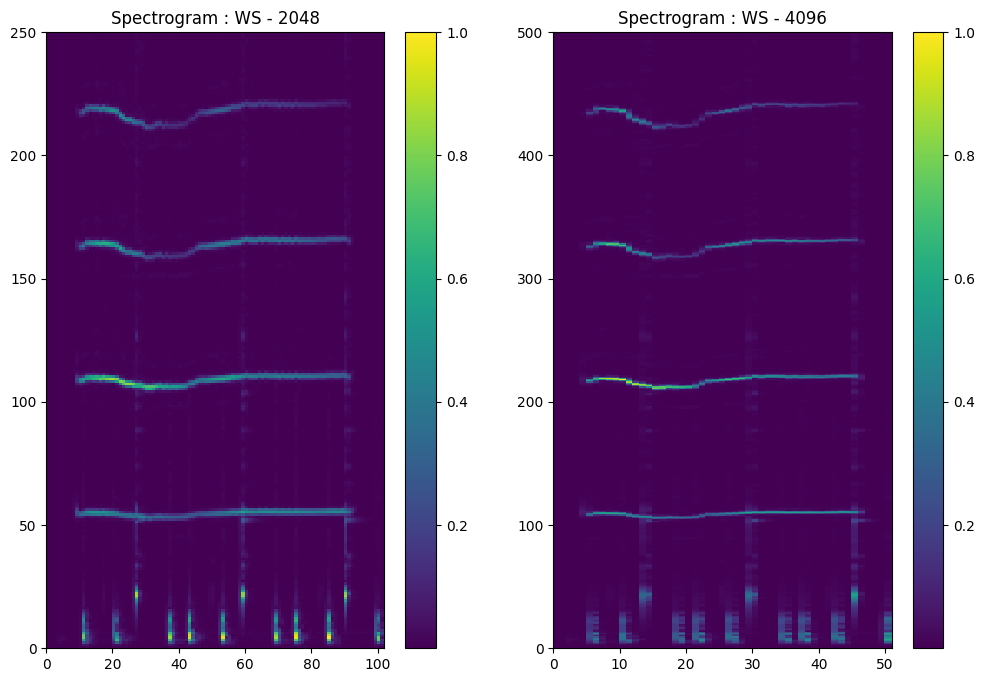

In [23]:
stft_2048 = librosa.core.stft(mixture_signal, hop_length=1024, n_fft=2048)
spectrogram_2048 = np.abs(stft_2048)
spectrogram_2048 = spectrogram_2048 / np.max(spectrogram_2048)
spectrogram_2048 = spectrogram_2048[:250, :]

stft_4096 = librosa.core.stft(mixture_signal, hop_length=2048, n_fft=4096)
spectrogram_4096 = np.abs(stft_4096)
spectrogram_4096 = spectrogram_4096 / np.max(spectrogram_4096)
spectrogram_4096 = spectrogram_4096[:500, :]

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
img = axes[0].pcolor(np.abs(spectrogram_2048))
axes[0].set_title("Spectrogram : WS - 2048")
plt.colorbar(img, ax=axes[0])

img = axes[1].pcolor(np.abs(spectrogram_4096))
axes[1].set_title("Spectrogram : WS - 4096")
plt.colorbar(img, ax=axes[1])

### Comparison of adaptive spectrogram and the regular spectrogram constructed using window size of 2048
#### The adaptive spectrogram strives to improve the frequency resolution in certain areas of the spectrogram without compromising on the temporal resolution in other areas. Notice how with the adaptive spectrogram, the frequency resolution of the harmonics is improved 

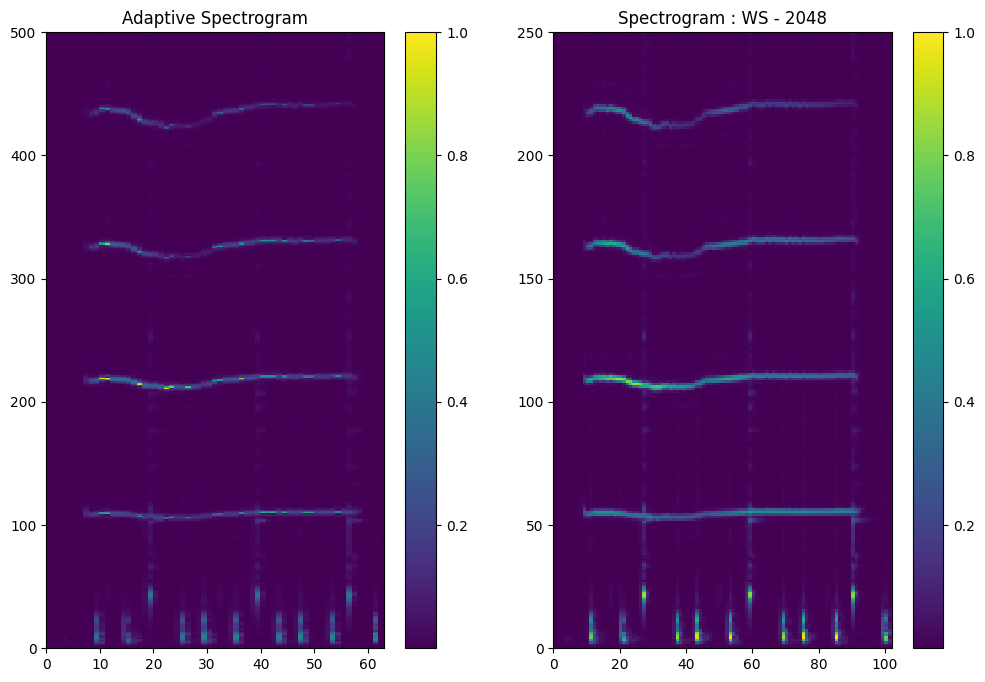

In [24]:
adspec = AdaptiveSpectrogram(mixture_signal, corr_threshold=0.85, logger=logger)
ad_spectrogram, signal_recon = adspec.generate_adaptive_spectrogram()
ad_spectrogram = np.abs(ad_spectrogram)
ad_spectrogram = ad_spectrogram / np.max(ad_spectrogram)
ad_spectrogram = ad_spectrogram[:500, :]

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
img = axes[0].pcolor(np.abs(ad_spectrogram))
axes[0].set_title("Adaptive Spectrogram")
plt.colorbar(img, ax=axes[0])

img = axes[1].pcolor(np.abs(spectrogram_2048))
axes[1].set_title("Spectrogram : WS - 2048")
plt.colorbar(img, ax=axes[1])

### Comparison of adaptive spectrogram and the regular spectrogram constructed using window size of 4096
#### Notice how the adaptive spectrogram is much superior in preventing energy smearing of the drum onsets compared to the spectrogram constructed using window size of 4096

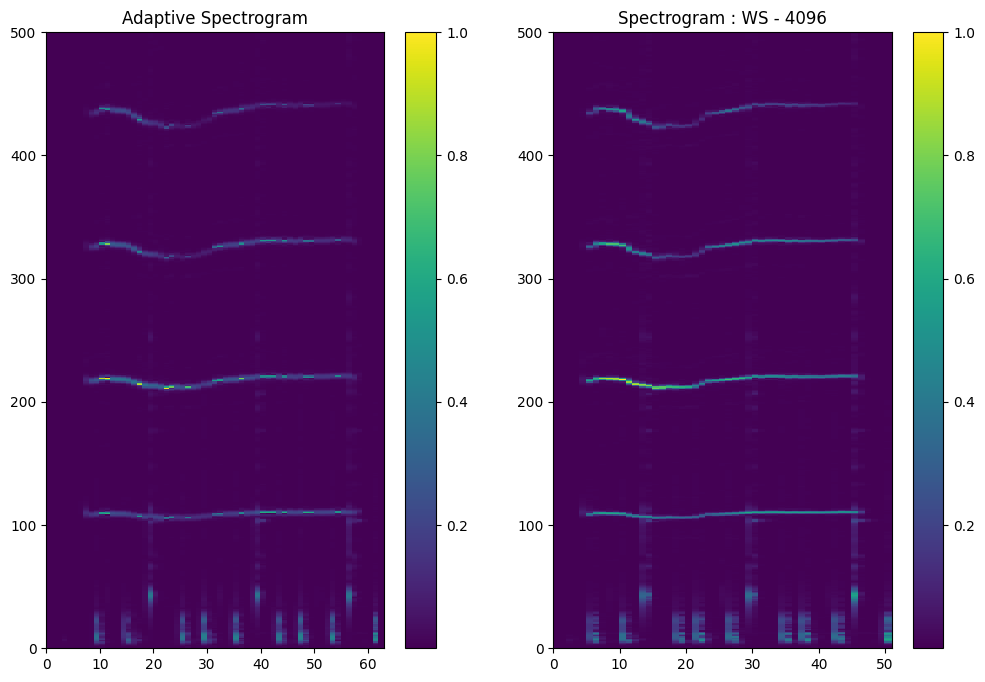

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
img = axes[0].pcolor(np.abs(ad_spectrogram))
axes[0].set_title("Adaptive Spectrogram")
plt.colorbar(img, ax=axes[0])

img = axes[1].pcolor(np.abs(spectrogram_4096))
axes[1].set_title("Spectrogram : WS - 4096")
plt.colorbar(img, ax=axes[1])